In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
from flask import Flask, jsonify

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
# Reflect Database into ORM classes
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

['measurement', 'station']

In [6]:
engine.execute('SELECT * FROM measurement LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [7]:
engine.execute('SELECT * FROM station LIMIT 5').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)]

In [8]:
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [9]:
inspector = inspect(engine)
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [10]:
# reflect an existing database into a new model

# reflect the tables
Measurement = Base.classes.measurement
Station = Base.classes.station


In [11]:
# We can view all of the classes that automap found


In [12]:
# Save references to each table


In [13]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [14]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


In [15]:
engine.execute('SELECT min(date) FROM measurement').fetchall()

[('2010-01-01',)]

In [16]:
engine.execute('SELECT max(date) FROM measurement').fetchall()

[('2017-08-23',)]

In [17]:
engine.execute("SELECT max(Measurement.prcp) FROM measurement where Measurement.date > '2016-08-22'").fetchall()

[(6.7,)]

In [18]:
dt = session.query(Measurement.date, func.max(Measurement.prcp)).\
    filter(Measurement.date > '2016-08-22').\
    filter(Measurement.prcp != 'None').\
    group_by(Measurement.date).\
    order_by(Measurement.date).all()
dt

[('2016-08-23', 1.79),
 ('2016-08-24', 2.28),
 ('2016-08-25', 0.21),
 ('2016-08-26', 0.04),
 ('2016-08-27', 0.18),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.9),
 ('2016-08-30', 0.05),
 ('2016-08-31', 2.46),
 ('2016-09-01', 0.02),
 ('2016-09-02', 0.19),
 ('2016-09-03', 1.0),
 ('2016-09-04', 0.74),
 ('2016-09-05', 0.18),
 ('2016-09-06', 1.0),
 ('2016-09-07', 1.35),
 ('2016-09-08', 0.22),
 ('2016-09-09', 0.35),
 ('2016-09-10', 1.16),
 ('2016-09-11', 0.6),
 ('2016-09-12', 1.04),
 ('2016-09-13', 1.2),
 ('2016-09-14', 6.7),
 ('2016-09-15', 3.35),
 ('2016-09-16', 0.61),
 ('2016-09-17', 0.36),
 ('2016-09-18', 0.42),
 ('2016-09-19', 0.25),
 ('2016-09-20', 0.43),
 ('2016-09-21', 1.02),
 ('2016-09-22', 0.75),
 ('2016-09-23', 0.94),
 ('2016-09-24', 0.27),
 ('2016-09-25', 0.04),
 ('2016-09-26', 1.02),
 ('2016-09-27', 1.0),
 ('2016-09-28', 0.08),
 ('2016-09-29', 1.49),
 ('2016-09-30', 0.38),
 ('2016-10-01', 1.02),
 ('2016-10-02', 0.61),
 ('2016-10-03', 0.46),
 ('2016-10-04', 3.46),
 ('2016-10-05', 0.

In [19]:
dt = session.query(Measurement.date, func.max(Measurement.prcp)).\
    filter(Measurement.date > '2016-08-22').\
    filter(Measurement.prcp != 'None').\
    group_by(Measurement.date).\
    order_by(Measurement.date).all()




df = pd.DataFrame(dt, columns=['date', 'prcp'])
df

,date,prcp
0,2016-08-23,1.79
1,2016-08-24,2.28
2,2016-08-25,0.21
3,2016-08-26,0.04
4,2016-08-27,0.18
...,...,...
361,2017-08-19,0.09
362,2017-08-20,0.01
363,2017-08-21,0.56
364,2017-08-22,0.50


In [20]:
dtt = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > '2016-08-22').\
    filter(Measurement.prcp != 'None').\
        order_by(Measurement.date).all()




dff = pd.DataFrame(dtt, columns=['date', 'prcp'])
dff.count()

date    2021
prcp    2021
dtype: int64

In [21]:
dtt = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > '2016-08-22').\
    filter(Measurement.prcp != 'None').\
        order_by(Measurement.date).all()

dff = pd.DataFrame(dtt, columns=['date', 'prcp'])
dff.count()
quartiles = dff['prcp'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f"The count of precipitation is: {dff.count()}")
print(f"The mean of precipitation is: {dff['prcp'].mean()}")
print(f"The std of precipitation is: {dff['prcp'].std()}")
print(f"The min of precipitation is: {dff['prcp'].min()}")
print(f"The 25 % of precipitation is: {lowerq}")
print(f"The interquartile range of precipitation is: {iqr}")
print(f"The 50 median of precipitation is: {quartiles[0.5]} ")
print(f"The 75 % of precipitation is: {upperq}")
print(f"The max  of precipitation is: {dff['prcp'].max()}")
print(f"The variance  of precipitation is: {dff['prcp'].var()}")

The count of precipitation is: date    2021
prcp    2021
dtype: int64
The mean of precipitation is: 0.17727857496288896
The std of precipitation is: 0.4611895038877027
The min of precipitation is: 0.0
The 25 % of precipitation is: 0.0
The interquartile range of precipitation is: 0.13
The 50 median of precipitation is: 0.02 
The 75 % of precipitation is: 0.13
The max  of precipitation is: 6.7
The variance  of precipitation is: 0.21269575849618533


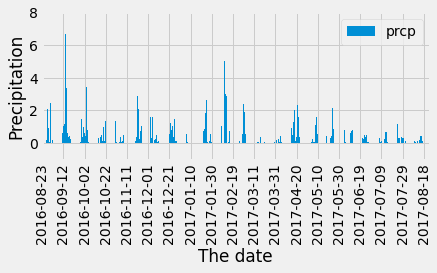

In [22]:
dt = session.query(Measurement.date, func.max(Measurement.prcp)).\
    filter(Measurement.date > '2016-08-22').\
    filter(Measurement.prcp != 'None').\
    group_by(Measurement.date).\
    order_by(Measurement.date).all()

df = pd.DataFrame(dt, columns=['date', 'prcp'])

df = df.dropna()

#x_axis = np.arange(0, len(dt))

x_axis = np.arange(0, len(dt), 20)


tick_locations = []
for x in x_axis:
    tick_locations.append(x)
    
dtdata = []
#for  index, row in df.iterrows():
#    try:
#        dtdata.append(row['date'])
#    except:
#        pass
prcp =  []
for index in x_axis:
    dtdata.append((df.values[index][0]))
    prcp.append((df.values[index][1]))

df.set_index('date', inplace=True)
    

#plt.xlim(-0.75, len(gyms)-.25)
#plt.ylim(0, max(members) + 5)

#plt.bar(dtdata, prcp, facecolor="red", alpha=0.75, align="center")
df.plot.bar()
plt.xticks(tick_locations, dtdata, rotation="vertical")
#plt.xticks(range(0, len(tick_locations)), dtdata, rotation="90")
plt.tight_layout()
plt.xlabel("The date")
plt.ylabel("Precipitation")
plt.ylim(-1,8)
#plt.xlim(0,385)
plt.show()


In [23]:
# Use Pandas to calcualte the summary statistics for the precipitation data
dtt = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > '2016-08-22').\
    filter(Measurement.prcp != 'None').\
        order_by(Measurement.date).all()

dff = pd.DataFrame(dtt, columns=['date', 'prcp'])
dff.count()
quartiles = dff['prcp'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f"The count of precipitation is: {dff.count()}")
print(f"The mean of precipitation is: {dff['prcp'].mean()}")
print(f"The std of precipitation is: {dff['prcp'].std()}")
print(f"The min of precipitation is: {dff['prcp'].min()}")
print(f"The 25 % of precipitation is: {lowerq}")
print(f"The interquartile range of precipitation is: {iqr}")
print(f"The 50 median of precipitation is: {quartiles[0.5]} ")
print(f"The 75 % of precipitation is: {upperq}")
print(f"The max  of precipitation is: {dff['prcp'].max()}")
print(f"The variance  of precipitation is: {dff['prcp'].var()}")

The count of precipitation is: date    2021
prcp    2021
dtype: int64
The mean of precipitation is: 0.17727857496288896
The std of precipitation is: 0.4611895038877027
The min of precipitation is: 0.0
The 25 % of precipitation is: 0.0
The interquartile range of precipitation is: 0.13
The 50 median of precipitation is: 0.02 
The 75 % of precipitation is: 0.13
The max  of precipitation is: 6.7
The variance  of precipitation is: 0.21269575849618533


In [24]:
# Design a query to show how many stations are available in this dataset?
stt = session.query(Station.id, Station.station, Station.name).all()
sttt = pd.DataFrame(stt, columns=['id','station', 'name'])
sttt.count()

id         9
station    9
name       9
dtype: int64

In [25]:
sttt.head(10)

,id,station,name
0,1,USC00519397,"WAIKIKI 717.2, HI US"
1,2,USC00513117,"KANEOHE 838.1, HI US"
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US"
3,4,USC00517948,"PEARL CITY, HI US"
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US"
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US"
6,7,USC00519281,"WAIHEE 837.5, HI US"
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US"
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US"


In [26]:
same_station= session.query(Measurement, Station).filter(Measurement.station == Station.station).limit(10).all()


for record in same_station:
    (meas, sta) = record
    print(meas.station)
    print(sta.station)


USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397


In [27]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

sel = [Measurement.station, 
           Station.name, 
       func.count(1)]
may_averages = session.query(*sel).\
    filter(Measurement.station == Station.station).\
    group_by(Measurement.station).\
    order_by(func.count(1).desc()).all()
may_averages


[('USC00519281', 'WAIHEE 837.5, HI US', 2772),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 2724),
 ('USC00513117', 'KANEOHE 838.1, HI US', 2709),
 ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 2669),
 ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 2612),
 ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 2202),
 ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 1979),
 ('USC00517948', 'PEARL CITY, HI US', 1372),
 ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 511)]

In [28]:
sel = [Measurement.station, 
           Station.name, 
       func.count(1)]
may_averages = session.query(*sel).\
    filter(Measurement.station == Station.station).\
    group_by(Measurement.station).\
    order_by(func.count(1).desc()).all()
may_averages

[('USC00519281', 'WAIHEE 837.5, HI US', 2772),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 2724),
 ('USC00513117', 'KANEOHE 838.1, HI US', 2709),
 ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 2669),
 ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 2612),
 ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 2202),
 ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 1979),
 ('USC00517948', 'PEARL CITY, HI US', 1372),
 ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 511)]

In [29]:
sel = [Measurement.station, 
       Station.name, 
       func.min(Measurement.tobs), 
       func.max(Measurement.tobs), 
       func.avg(Measurement.tobs),
      func.count(1)]


may_averages = session.query(*sel).\
    filter(Measurement.station == Station.station).\
    group_by(Measurement.station).\
    order_by(func.count(1).desc()).all()
may_averages

[('USC00519281', 'WAIHEE 837.5, HI US', 54.0, 85.0, 71.66378066378067, 2772),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 56.0, 87.0, 74.55323054331865, 2724),
 ('USC00513117', 'KANEOHE 838.1, HI US', 59.0, 85.0, 72.68918420081211, 2709),
 ('USC00519523',
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  56.0,
  85.0,
  74.5436493068565,
  2669),
 ('USC00516128',
  'MANOA LYON ARBO 785.2, HI US',
  58.0,
  84.0,
  70.91500765696784,
  2612),
 ('USC00514830',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  58.0,
  85.0,
  74.8732970027248,
  2202),
 ('USC00511918',
  'HONOLULU OBSERVATORY 702.2, HI US',
  53.0,
  87.0,
  71.61596766043456,
  1979),
 ('USC00517948', 'PEARL CITY, HI US', 58.0, 87.0, 74.68440233236151, 1372),
 ('USC00518838',
  'UPPER WAHIAWA 874.3, HI US',
  58.0,
  83.0,
  72.72407045009784,
  511)]

In [30]:
engine.execute('SELECT max(date) FROM measurement where station="USC00519281"').fetchall()

[('2017-08-18',)]

In [31]:
engine.execute('SELECT * FROM station').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [32]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?


In [33]:
engine.execute('SELECT * FROM measurement where station="USC00519281" and date > "2016-08-17"').fetchall()

[(14603, 'USC00519281', '2016-08-18', 0.0, 80.0),
 (14604, 'USC00519281', '2016-08-19', 0.31, 79.0),
 (14605, 'USC00519281', '2016-08-20', 0.13, 81.0),
 (14606, 'USC00519281', '2016-08-21', 0.08, 79.0),
 (14607, 'USC00519281', '2016-08-22', 2.32, 78.0),
 (14608, 'USC00519281', '2016-08-23', 1.79, 77.0),
 (14609, 'USC00519281', '2016-08-24', 2.15, 77.0),
 (14610, 'USC00519281', '2016-08-25', 0.06, 80.0),
 (14611, 'USC00519281', '2016-08-26', 0.01, 80.0),
 (14612, 'USC00519281', '2016-08-27', 0.12, 75.0),
 (14613, 'USC00519281', '2016-08-28', 0.6, 73.0),
 (14614, 'USC00519281', '2016-08-29', 0.35, 78.0),
 (14615, 'USC00519281', '2016-08-30', 0.0, 77.0),
 (14616, 'USC00519281', '2016-08-31', 0.24, 78.0),
 (14617, 'USC00519281', '2016-09-01', 0.02, 80.0),
 (14618, 'USC00519281', '2016-09-02', 0.01, 80.0),
 (14619, 'USC00519281', '2016-09-03', 0.12, 78.0),
 (14620, 'USC00519281', '2016-09-04', 0.14, 78.0),
 (14621, 'USC00519281', '2016-09-05', 0.03, 78.0),
 (14622, 'USC00519281', '2016-09-0

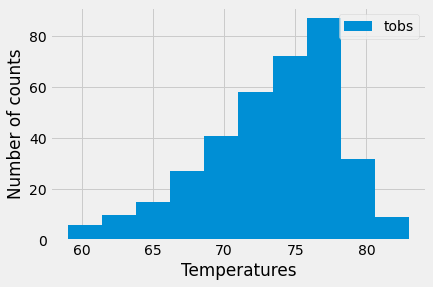

In [34]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


may_averages = session.query(Measurement.tobs).\
    filter(Measurement.station == "USC00519281").\
    filter(Measurement.date > "2016-08-17").all()
df = pd.DataFrame(may_averages, columns=['tobs'])
plt.hist(df.tobs)

clt = []
clt.append('tobs')
plt.legend(clt, loc='upper right')
plt.xlabel("Temperatures")
plt.ylabel("Number of counts")
plt.show()

## Bonus Challenge Assignment

In [35]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    # Query all passengers
    sel = [Measurement.station, 
       Station.name, 
       func.min(Measurement.tobs), 
       func.max(Measurement.tobs), 
       func.avg(Measurement.tobs)]

    results = session.query(*sel).\
        filter(Measurement.station == Station.station).\
        filter(Measurement.date > start_date ).\
        filter(Measurement.date < end_date ).\
        group_by(Measurement.station).\
        order_by(func.count(1).desc()).all()

    session.close()
    # Create a dictionary from the row data and append to a list of all_passengers
    all_temp = []
    for station, name, minTemp, maxTemp, avgTemp in results:
        temp_dict = {}
        temp_dict["station"] = station
        temp_dict["name"] = name
        temp_dict["minTemp"] = minTemp
        temp_dict["maxTemp"] = maxTemp
        temp_dict["avgTemp"] = avgTemp
        temp_dict["peakToPeak"] = maxTemp-minTemp
        all_temp.append(temp_dict)

    # Convert list of tuples into normal list
    #all_dates = list(np.ravel(results))
    df = pd.DataFrame(all_temp)
    return df
    
#    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
#        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

       station                                    name  minTemp  maxTemp  \
0  USC00519523      WAIMANALO EXPERIMENTAL FARM, HI US     68.0     73.0   
1  USC00519397                    WAIKIKI 717.2, HI US     67.0     74.0   
2  USC00519281                     WAIHEE 837.5, HI US     68.0     71.0   
3  USC00516128            MANOA LYON ARBO 785.2, HI US     66.0     69.0   
4  USC00513117                    KANEOHE 838.1, HI US     67.0     72.0   
5  USC00511918       HONOLULU OBSERVATORY 702.2, HI US     66.0     74.0   
6  USC00518838              UPPER WAHIAWA 874.3, HI US     65.0     74.0   
7  USC00517948                       PEARL CITY, HI US     70.0     74.0   
8  USC00514830  KUALOA RANCH HEADQUARTERS 886.9, HI US     69.0     71.0   

     avgTemp  peakToPeak  
0  72.000000         5.0  
1  71.400000         7.0  
2  69.800000         3.0  
3  67.000000         3.0  
4  70.200000         5.0  
5  71.800000         8.0  
6  68.750000         9.0  
7  72.333333         4.

In [36]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
print(calc_temps('2017-01-01', '2018-01-01'))

       station                                    name  minTemp  maxTemp  \
0  USC00519397                    WAIKIKI 717.2, HI US     60.0     87.0   
1  USC00516128            MANOA LYON ARBO 785.2, HI US     58.0     82.0   
2  USC00519281                     WAIHEE 837.5, HI US     59.0     83.0   
3  USC00513117                    KANEOHE 838.1, HI US     61.0     82.0   
4  USC00519523      WAIMANALO EXPERIMENTAL FARM, HI US     60.0     85.0   
5  USC00514830  KUALOA RANCH HEADQUARTERS 886.9, HI US     63.0     83.0   
6  USC00517948                       PEARL CITY, HI US     62.0     87.0   

     avgTemp  peakToPeak  
0  74.982533        27.0  
1  72.063348        24.0  
2  72.145455        24.0  
3  72.516588        21.0  
4  76.741627        25.0  
5  76.958763        20.0  
6  74.056075        25.0  


Text(0.5, 0, ' station')

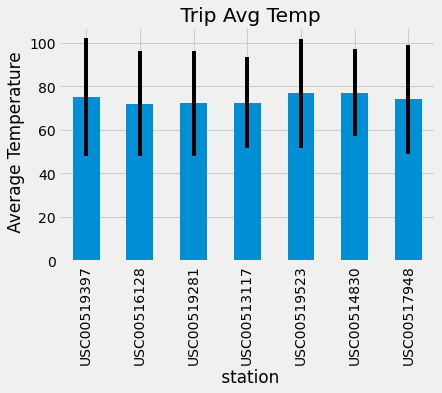

In [52]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
dtt = calc_temps('2017-01-01', '2018-01-01')
errors = dtt['peakToPeak']
dtta=dtt['avgTemp']
dtts=dtt['station']
fig, ax = plt.subplots()
dtta.plot.bar(yerr=errors, ax=ax)
plt.xticks(range(0, len(dtts)), dtts, rotation="90")
plt.title(" Trip Avg Temp")
plt.ylabel(" Average Temperature")
plt.xlabel(" station")

In [45]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

sel = [Measurement.station, 
   Station.name, 
   Station.latitude, 
   Station.longitude, 
   Station.elevation, 
   func.sum(Measurement.prcp)]

results = session.query(*sel).\
    filter(Measurement.station == Station.station).\
    filter(Measurement.date > '2017-01-01' ).\
    filter(Measurement.date < '2018-01-01' ).\
    group_by(Measurement.station).\
    order_by(func.sum(Measurement.prcp).desc()).all()

dfprcp = pd.DataFrame(results,columns=['station','name','latitude','longitude','elevation','total_precipitation'])
dfprcp

,station,name,latitude,longitude,elevation,total_precipitation
0,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4,68.75
1,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9,43.63
2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6,34.33
3,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5,27.32
4,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0,21.80
5,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0,10.66
6,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9,3.39


In [51]:
engine.execute('SELECT ms.station, st.name, st.latitude, st.longitude, st.elevation, sum(ms.prcp) FROM  measurement ms, station st where ms.station=st.station and ms.date > "2017-01-01" and ms.date < "2018-01-01" group by ms.station order by 6 desc').fetchall()

[('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 68.75000000000003),
 ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 43.63000000000002),
 ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 34.33000000000002),
 ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, 27.319999999999993),
 ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 21.80000000000002),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 10.659999999999993),
 ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 3.39)]

In [54]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
#daily_normals("01-01")
dfprcp = pd.DataFrame(daily_normals("01-01"),columns=['tmin','tmax','tavg'])
dfprcp

,tmin,tmax,tavg
0,62.0,69.153846,77.0


([<matplotlib.axis.XTick at 0x2d5a31bd640>,
 [Text(0, 0, '2017-01-01'),
  Text(0, 0, '2017-01-02'),
  Text(0, 0, '2017-01-03'),
  Text(0, 0, '2017-01-04'),
  Text(0, 0, '2017-01-05'),
  Text(0, 0, '2017-01-06')])

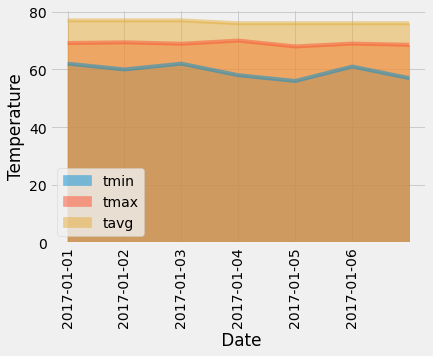

In [121]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date

trip_dt =['2017-01-01','2017-01-02','2017-01-03','2017-01-04','2017-01-05','2017-01-06','2017-01-07']

tmin = []
tmax = []
tavg = []

for x in trip_dt:
    data_rain = daily_normals(x.replace('2017-',''))
    tmin.append(data_rain[0][0])
    tmax.append(data_rain[0][1])
    tavg.append(data_rain[0][2])
#    print(func.strftime("%m-%d", x))
#    print(x.replace('2017-',''))

df = pd.DataFrame({
    'tmin': tmin,
    'tmax': tmax,
    'tavg': tavg,
})
ax = df.plot.area( stacked=False)  
plt.xlabel(" Date")
plt.ylabel("Temperature")
plt.xticks(range(0, len(trip_dt)-1), trip_dt, rotation="vertical")

In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


Text(0, 0.5, 'Temperature')

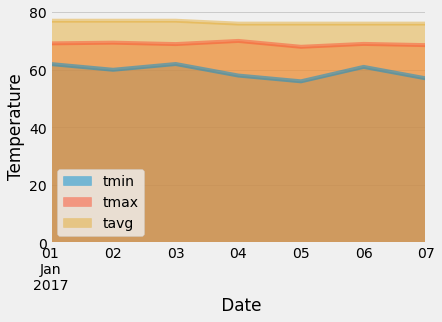

In [122]:
# Plot the daily normals as an area plot with `stacked=False`
trip_dt =['2017-01-01','2017-01-02','2017-01-03','2017-01-04','2017-01-05','2017-01-06','2017-01-07']

tmin = []
tmax = []
tavg = []

for x in trip_dt:
    data_rain = daily_normals(x.replace('2017-',''))
    tmin.append(data_rain[0][0])
    tmax.append(data_rain[0][1])
    tavg.append(data_rain[0][2])
#    print(func.strftime("%m-%d", x))
#    print(x.replace('2017-',''))

df = pd.DataFrame({
    'tmin': tmin,
    'tmax': tmax,
    'tavg': tavg,
}, index=pd.date_range(start='2017/01/01', end='2017/01/07',freq='D'))
ax = df.plot.area( stacked=False)  
plt.xlabel(" Date")
plt.ylabel("Temperature")
#plt.xticks(range(0, len(trip_dt)-1), trip_dt, rotation="vertical")